In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [36]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

7


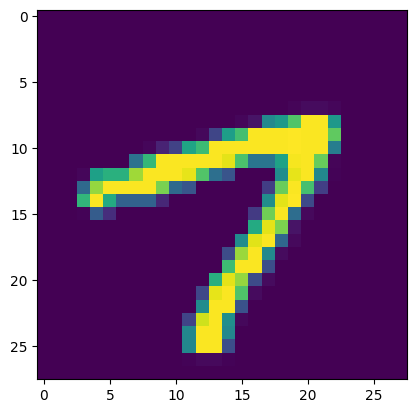

In [37]:
import matplotlib.pyplot as plt

plt.imshow(X_train[101])
print(y_train[101])

In [38]:
print(y_train[101])

7


#### Scaling the data to the range 0 to 1

In [39]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [40]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))  #Converts the data into 1D, into 756. Only conversion is done and no training is done.
model.add(Dense(128,activation = 'relu'))   #Add a hidden layer with 128 nodes.
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation='softmax'))   #Softmax for multiclass classification./10 nodes in the output layer because there are 10 classes

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train,epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2861 - accuracy: 0.9176 - val_loss: 0.1593 - val_accuracy: 0.9544
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1215 - accuracy: 0.9637 - val_loss: 0.1095 - val_accuracy: 0.9701
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0832 - accuracy: 0.9746 - val_loss: 0.1075 - val_accuracy: 0.9680
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.1005 - val_accuracy: 0.9714
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.1037 - val_accuracy: 0.9690
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9880 - val_loss: 0.0972 - val_accuracy: 0.9724
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.1029 - val_accuracy:

In [45]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [46]:
y_pred = y_prob.argmax(axis = 1)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9756

The accuracy of the model is 97.56%.

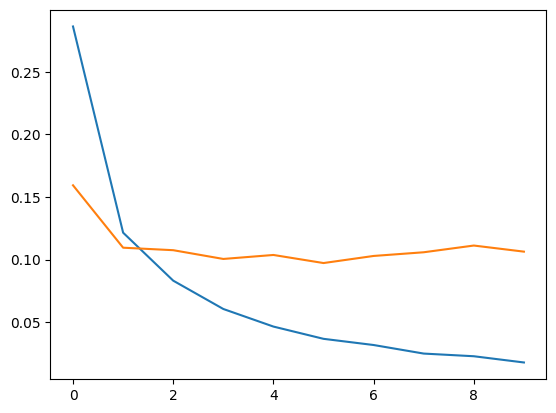

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#### Now we are checking if the image can be correctly classified by the model.

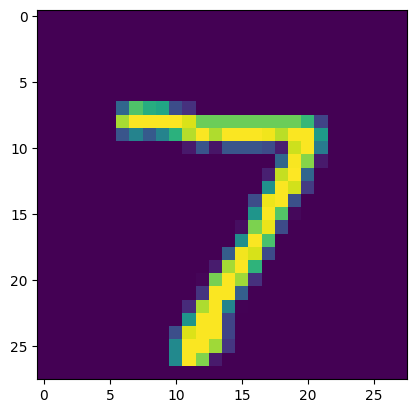

In [49]:
plt.imshow(X_test[0])

In [51]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 43ms/step


array([7])

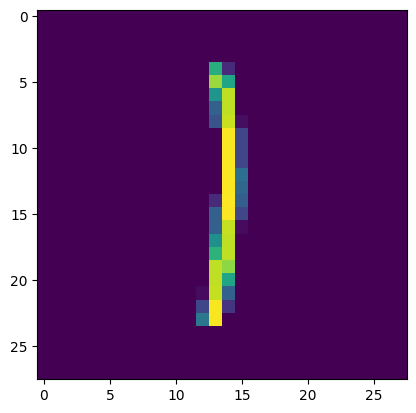

In [52]:
plt.imshow(X_test[40])

In [53]:
model.predict(X_test[40].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([1])